# Autoencoder
### Author: Tim Holland
### Date: 10/05/2024
Autoencoders learn efficient representations of input data without the need for labels (unsupervised learning). They have a two-sided architecture. The encoder compresses data into a reduced-dimensional representation (latent space). The decoder rebuilds this latent representation to represent the initial input.

### Importing & preprocessing MNIST dataset

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [18]:
# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

### Architecture

In [19]:
# Autoencoder Architecture:
#
#  Input (28, 28)
#     |
#  Flatten (784)
#     |
#  Encoding Layer (32)
#     |
#  Dense (784)
#     |
#  Reshape (28, 28)
#     |
#  Output (28, 28)
#
# Input image = 28x28 grayscale image.
# Flatten layer = flattens the input image into a 784-dimensional vector.
# Encoding layer = compression of input into a 32-dimensional latent space.
# Dense layer = maps the latent space representation back to a 784-dimensional vector.
# Reshape layer = reshapes the 784-dimensional vector back to a 28x28 image.
# Output layer = reconstructed 28x28 grayscale image.

input_shape = x_train.shape[1:]
encoding_dim = 32

input_layer = Input(shape=input_shape)
x = Flatten()(input_layer)
encoded = Dense(encoding_dim, activation='relu')(x)
decoded = Dense(np.prod(input_shape), activation='sigmoid')(encoded)
output_layer = Reshape(input_shape)(decoded)

autoencoder = Model(input_layer, output_layer)

### Compiling & Training

In [20]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Create a separate encoder model
encoder = Model(input_layer, encoded)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3860 - val_loss: 0.1874
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1779 - val_loss: 0.1538
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1500 - val_loss: 0.1348
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1326 - val_loss: 0.1220
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1204 - val_loss: 0.1117
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1113 - val_loss: 0.1052
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1052 - val_loss: 0.1007
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1013 - val_loss: 0.0979
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0987 - val_loss: 0.0959
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0970 - val_loss: 0.0948
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0958 - val_loss: 0.0939
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

### Application 1: Obtain Encoded & Decoded Representations & Plot

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step


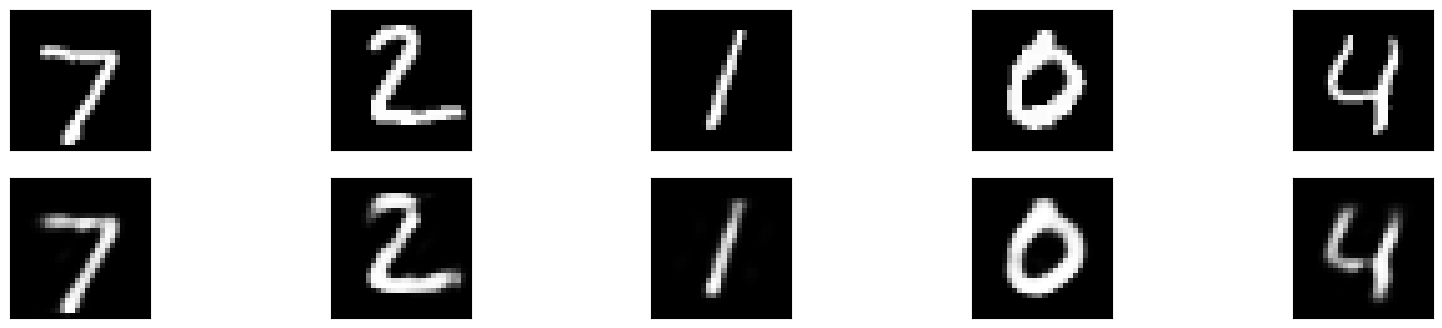

In [25]:
# Encode and decode some test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Plot five instances of the encoded and decoded images
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # Plot the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Plot the reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()